# OneMax問題をGAで解く

## 必要モジュールのインポート

In [1]:
import random
import copy
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

## 個体クラスの定義

In [2]:
class Individual:
    def __init__(self, g_length):
        self.gene = [random.randint(0,1) for i in range(g_length)] # 遺伝子をランダムに生成
        self.fitness = sum(self.gene) # 適応度を計算
    
    # 個体の適応度のリセット
    def reset_fitness(self):
        self.fitness = sum(self.gene)
    
    # 個体情報の出力
    def print_individual(self):
        print(self.gene)

## シミュレーションクラスの定義

In [3]:
class Simulation:
    def __init__(self, pop_size, g_length):
        self.population = [Individual(g_length) for i in range(pop_size)]
        self.offspring = []
    
    # ルーレット選択
    def roulette_selection(self):
        roulette = []
        for i in self.population:
            roulette.append(i.fitness)
        #print('fitness:', roulette)
            
        probs = np.array(roulette)/sum(roulette)
        #print('weight:', probs)
        
        parent = []
        for i in range(2):
            selected = np.random.choice(self.population, p=probs)
            parent.append(copy.deepcopy(selected))
    
        return parent
    
    # 二点交叉
    def crossover(self, parent1, parent2):
        # 2つの交叉点（r1, r2）をランダムに選ぶ．r2>=r1
        r1 = random.randint(0, g_length-1)
        r2 = random.randint(r1, g_length-1)
        
        # 子1の生成
        offspring1 = copy.deepcopy(parent1)
        # r1からr2の間は親2の遺伝子をコピー
        offspring1.gene[r1:r2] = parent2.gene[r1:r2]
        
        # 確率mutation_rateで突然変異
        if random.random() < mutation_rate:
            self.mutate(offspring1)
        
        # 子2の生成
        offspring2 = copy.deepcopy(parent2)
        offspring2.gene[r1:r2] = parent1.gene[r1:r2]
        if random.random() < mutation_rate:
            self.mutate(offspring2)        
        
        self.offspring.append(offspring1)
        self.offspring.append(offspring2)
        
    # 突然変異
    def mutate(self, offspring):
        # ランダムに選んだ場所の0，1を反転
        r = random.choice(range(g_length))
        offspring.gene[r] = 1 if offspring.gene[r] == 0 else 0
        
    # 世代交代    
    def generation_change(self):
        self.population.clear()
        self.population = copy.deepcopy(self.offspring)
        self.offspring.clear()

    # 進化    
    def evolve(self, mulation_rate):
        print('generation: ' + str(g + 1))
        mean_list.append(self.mean_fitness())
        max_list.append(self.max_fitness())
        self.print_population()
        self.reset_fitness()
    
        while len(self.offspring) < len(self.population):
            parent = self.roulette_selection()
            
            self.crossover(parent[0], parent[1])
        
        self.generation_change()
        print('--------------------------')
    
    # 集団情報の出力
    def print_population(self):
        for i in self.population:
            i.print_individual()
    
    # 集団の適応度リセット
    def reset_fitness(self):
        for i in self.population:
            i.reset_fitness()
            
    # 集団の平均適応度
    def mean_fitness(self):
        fitness = []
        for i in self.population:
            fitness.append(i.fitness)
            
        return mean(fitness)
            
    # 集団の最大適応度
    def max_fitness(self):
        fitness = []
        for i in self.population:
            fitness.append(i.fitness)
        
        return max(fitness)

## シミュレーションの実行

generation: 1
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]
[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]
[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]
[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0]
[1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]
[1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]
[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]
[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0]
[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 

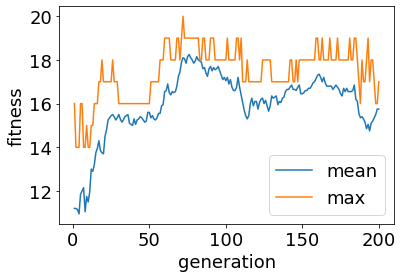

In [4]:
# パラメータ
g_length = 20        # 遺伝子長
pop_size = 20        # 個体数
generation = 200     # 世代数
mutation_rate = 0.1  # 突然変異率

# シミュレーションオブジェクトの生成
sim = Simulation(pop_size, g_length)

# グラフ用リスト
g_list = []
mean_list = []
max_list = []

# 進化メソッドを世代数分回す
for g in range(generation):
    g_list.append(g+1)
    sim.evolve(mutation_rate)

# グラフ生成
plt.rcParams["font.size"] = 18
plt.plot(g_list, mean_list, label='mean')
plt.plot(g_list, max_list, label='max')
plt.xlabel('generation')
plt.ylabel('fitness')
plt.legend()